### I have selected the TMDB movie data set for my project analysis. This dataset contains around 10k rows and 21 columns with user ratings, budget and revenue of different movies over several years. 

In [12]:
#Imported pandas, numpy, matplotlib and seaborn libraries to do easy mathematical computations 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

#### Using pandas read_csv function to load the dataset into the jupyter notebook

In [13]:
df_f = pd.read_csv('tmdb-movies.csv')
df_f.info()
df_f.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

(10866, 21)

#### While investigating the dataset and datatypes, I come across some null values in columns like homepage, director, keywords and more. 

#### I fix the null value problem by filling all the null value rows with 0. (I could drop all the null values but that would end up in me losing over 35% percent of data from the dataset)

In [14]:
df_f.fillna(0, inplace=True)

#### The datatype of 'release_date' is not in correct format. It should be in proper datetime format

In [15]:
df_f['release_date'] = pd.to_datetime(df_f['release_date'])

#### Checked for duplicates and dropped them

In [16]:
df_f.drop_duplicates(inplace=True)

#### Certain columns in the dataset contains multiple values in a single row separated by '|'. Replaced them all by ',' for better reading clarity.

In [17]:
df_f['genres'] = df_f['genres'].str.replace("|", ",")
df_f['cast'] = df_f['cast'].str.replace("|", ",")
df_f['production_companies'] = df_f['production_companies'].str.replace("|", ",")
df_f['director'] = df_f['director'].str.replace("|", ",")

#### In my view, some columns like 'budget_adj','revenue_adj','overview','imdb_id','homepage','tagline' in the dataset, do not seem like an important aspect for my analysis. So I drop them 

In [7]:
df_f.drop(['budget_adj','revenue_adj','overview','imdb_id','homepage','tagline'],axis =1, inplace=True)

#### Using describe function, I can see that the minimum value for revenue and budget are 0.0 which is not a practical scenario given that the movie went into production and got released, there should definitely be an amount for revenue as well as budget. 

#### To encounter this problem, I decide to include only those rows which have non-zero values for 'revenue' and 'budget'.

In [18]:
df_f = df_f[df_f.budget != 0]
df_f = df_f[df_f.revenue != 0]

#### For my analysis, I calculated profits for all the figures to use it later for comparisions 

In [19]:
tmp_profit = df_f['revenue'] - df_f['budget']
profit = round(tmp_profit/10**9, 2) #Dividing by 10^9 to get values in billions
df_f['profit'] = profit


#### Once I am done with data gathering and data cleansing, It's time to pose some questions pertaining to the movie dataset

## Posing Research Questions

### 1. Which year has the highest release of movies?

In [26]:
highest_release_year = df_f.release_year.value_counts().index[0]
print("Year with the highest release of movies:", highest_release_year)


Year with the highest release of movies: 2011


### 2. Which movie has the highest and lowest profit in terms of revenue?

In [60]:
#Calculating movies with min and max profitable movies
max_profit = df_f.profit.max()
df_max_prft_mov_idx = df_f.index[df_f['profit'] == max_profit].tolist()[0]

print("Movie with the highest profits:", df_f.at[df_max_prft_mov_idx,'original_title'])

min_profit = df_f.profit.min()
df_min_prft_mov_idx = df_f.index[df_f['profit'] == min_profit].tolist()[0]

print("Movie with the lowest profits:", df_f.at[df_min_prft_mov_idx,'original_title'])

Movie with the highest profits: Avatar
Movie with the lowest profits: The Warrior's Way


### 3. Top 10 directors based on  profits (total) their movies make.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

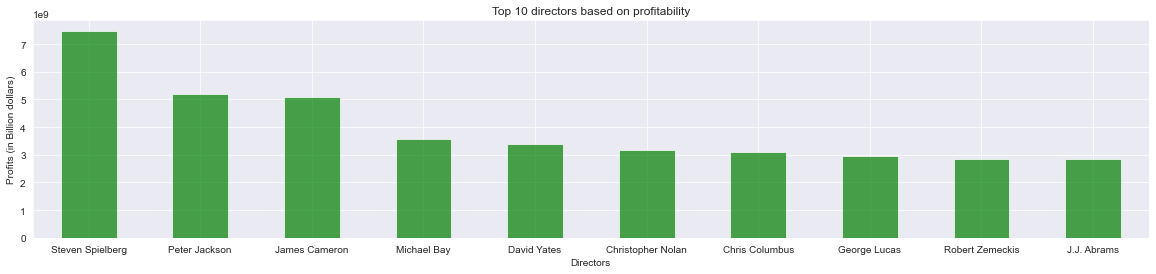

In [39]:
director_list = []
for i,val in df_f.iterrows():
    director_val = val['director']
    profit_val = val['profit']
    dir_list = str(director_val).split(',')
    for director in dir_list:
        director_list.append([director,profit_val])

df_dp = pd.DataFrame(director_list, columns=["Directors", "Profit"])

df_dp.groupby("Directors")["Profit"].sum().sort_values(ascending=False).head(10).plot(kind="bar", width=0.5, color='green',alpha=0.7, figsize=(20,4))

plt.ylabel("Profits (in Billion dollars)")
plt.title("Top 10 directors based on profitability")
plt.xticks(rotation=0)

### Plot Analysis :-
#### According to the graph analysis, 
##### -> Director Steven Speilberg's movies make the maximum profits standing at 7.44 Billion dollars
##### -> The lowest profits making directors(in top 10) are Robert Zemeckis, J.J. Abrams and George Lucas with total profits standing at 2.85, 2.85 and 2.95 Billion dollars respectively.



### 4. Which are the most popular genres based on their popularity?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

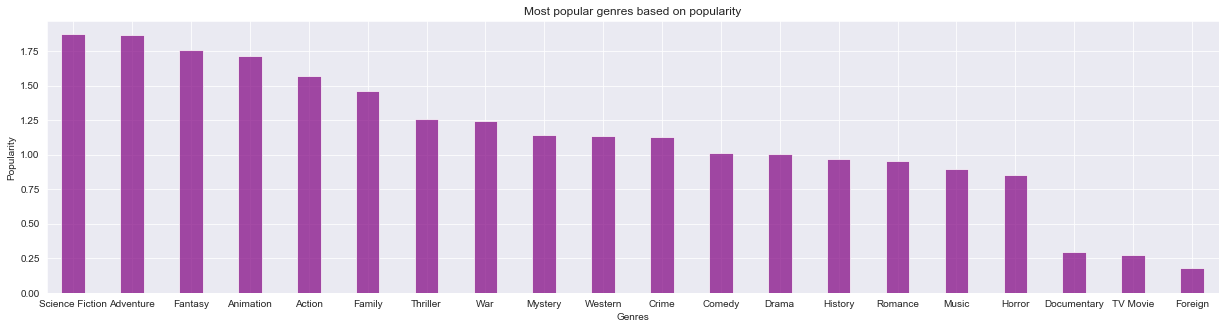

In [10]:
genre_list = []
for i,row in df_f.iterrows():
    genre_string = str(row['genres'])
    if(genre_string != "nan"):
        popularity = row['popularity']
        gen_list = genre_string.split(",")
        for genre in gen_list:
            genre_list.append([genre,popularity])

#Created a new dataframe with only 2 columns for 'Genre' and 'Popularity'
df_gen_pop = pd.DataFrame(genre_list, columns=["Genre", "Popularity"])

df_gen_pop.groupby('Genre')['Popularity'].mean().sort_values(ascending=False).plot(kind="bar", width=0.4, color='purple',alpha=0.7, figsize=(21,5))
plt.xlabel("Genres")
plt.ylabel("Popularity")
plt.title("Most popular genres based on popularity")
plt.xticks(rotation=0)


### Plot Analysis:-
#### -> According to the graph, it can be clearly inferred that the most popular genre amongst audiences is Adventure followed by Science Fiction, Fantasy and Action. 

#### -> The least popular genre is Foreign and Documentary movies.

#### -> Genres like Comedy, Romance, Drama, Western and History are all equally popular amongst the audiences.

### 5. Top 10 actors with highest number of movies

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

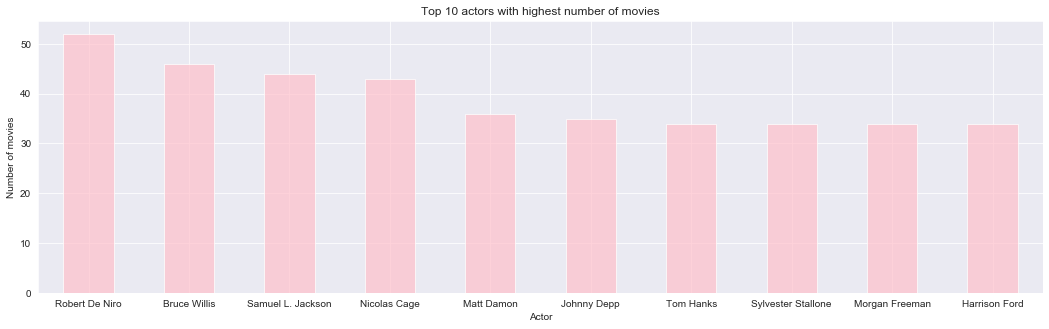

In [14]:
#Top actors with highest number of movies
actors_list = []
for i,val in df_f.iterrows():
    if(str(val["cast"]) != "nan"):
        actors = str(val["cast"]).split(",")
        for actor in actors:
            actors_list.append([actor])
        

df_a = pd.DataFrame(actors_list, columns=["Actor"])
df_a.groupby("Actor")["Actor"].count().sort_values(ascending=False).head(10).plot(kind="bar", width=0.5, color="pink", alpha=0.7, figsize=(18,5))
    
plt.title("Top 10 actors with highest number of movies")
plt.xlabel("Actor")
plt.ylabel("Number of movies")    
plt.xticks(rotation=0)

### Plot Analysis :-
#### This bar graph depicts the top 10 actors who've featured in the maximum number of movies of all time. 

#### -> Robert De Niro seems to top the charts with a total of 52 movies.
#### -> Followed by that, Bruce Willis, Samuel L Jackson and Nicholas Cage seem to lead the charts with 46, 44 and 43 movies each respectively.
#### -> On the contrary, Tom Hanks, Sylvester Stallone, Morgan Freeman and Harrison Ford are clearly shown to be on the lower side with respect to the number of movies they have done in the given years.

### Inferences :-
#### -> This can imply that some actors of the likes of Tom Hanks, Morgan Freeman and Sylvester Stallon are quite choosy and watchful of the number of movies they choose to do

#### -> At the same time, the high frequency of movies for Robert De Niro, Bruce Willis and Samuel L Jackson might imply that these artists are really popular amongst the audiences because of the movies they choose to do and hence the  audiences would want to watch them on the screen more.

### 6. How popularity varies with runtime of a movie

Text(0, 0.5, 'mean popularity')

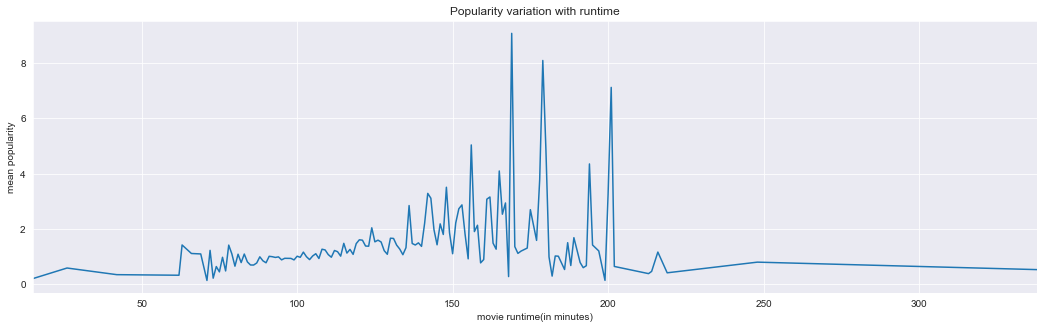

In [11]:
#Runtime vs Popularity
df_p = pd.DataFrame(columns=["runtime", "popularity"])
df_p["runtime"] = df_f["runtime"]
df_p["popularity"] = df_f["popularity"]
df_p = df_p[df_p.runtime != 0]


df_p.groupby("runtime")["popularity"].mean().plot(kind="line", figsize=(18,5))
plt.title("Popularity variation with runtime")
plt.xlabel("movie runtime(in minutes)")
plt.ylabel("mean popularity")

### Plot Analysis :-
#### -> According to this line graph, movies having a runtime typically between 150-200 minutes are highly popular amongst the viewers
#### -> On the other hand, movies with very low runtime ranging from 40-120 minutes as well as movies with really high runtime ranging from 210-350 minutes are very unpopular.

### Inferences :-
#### -> Generally, audiences would find a 2.5-3 hour (150-200 minutes) long movie as a favourable viewing time for movies. 
#### -> A 4-5 hour long movie would be way too boring and soporific and are hence least popular amongst the viewers.
#### -> Similarly, movies ranging from 40 mins to an hour are also not quite favourable and not enjoyed as much by the viewers, going by the popularity scores.


### 7. Number of movies released from 1965-2015

Text(0, 0.5, 'Number of movies')

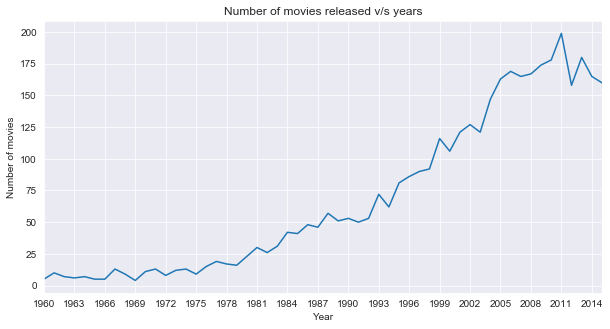

In [43]:
df_f.groupby('release_year').count()['id'].plot(kind="line", xticks=np.arange(1960,2016,3), figsize=(10,5))
plt.title('Number of movies released v/s years')
plt.xlabel('Year')
plt.ylabel('Number of movies')

### -> Plot Analysis :-
#### -> Looking at this line graph, it is clearly implied that the graph shows a positive correlation in terms of release of movies through the years 
#### -> With each progressing year, the number of movies released seem to be increasing in a steady manner.
#### -> According to the graph, 2011 seems to be the year with the highest number of movie releases i.e. 200 movies.
#### -> Years ranging from 1960-1981 saw quite low numbers with respect to movie releases.
#### -> There seems to a sudden downward spike in the number of movie releases from 2011 to 2013.

### -> Inferences :-
#### -> In my view, production and release of movies in older times (1960-1981) was quite less. 
#### -> It might be because people then didnt enjoy going to movies as much as they do today. 
#### -> Factors like expensive movie tickets, accessibility and low promulgation of cinema in those times could also be accounted for reasons for less movie releases .
#### -> With the advancement in technology and media over time, more people were introduced to the concept of enjoying movies in the theatres which in turn lead to a higher demand in the number of movies with each passing year.

### 8. Top 10 movies with highest profits

Text(0, 0.5, 'Movie')

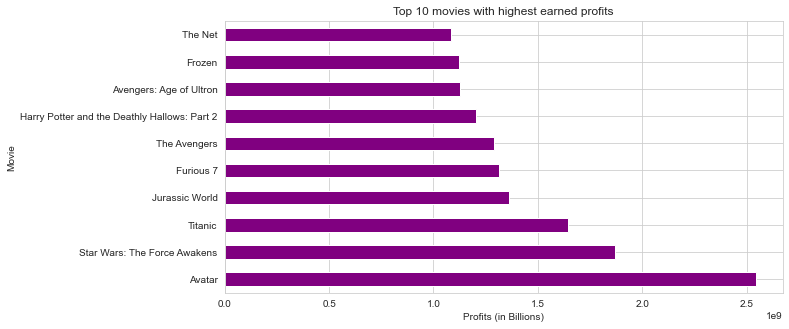

In [102]:
df_f.groupby("original_title")["profit"].sum().sort_values(ascending = False).head(10).plot(kind="barh", color="purple", figsize=(10,5))
plt.title("Top 10 movies with highest earned profits")
plt.xlabel("Profits (in Billions)")
plt.ylabel("Movie Titles")

### -> Plot Analysis :-
#### -> This bar plot depicts the top 10 movies with the highest earned profits.
#### -> According to the plot, Avatar is clearly the highest grossing movie of all time with profits of above 2.5 billion dollars.
#### -> This is followed by Star Wars: The force awakens grossing a profit of around 1.8 billion dollars and Titanic grossing profits of around 1.65 billion dollars.
#### -> Movies like 'The Net', 'Frozen' and 'Avengers: Age of Ultron' are on the lower end of the charts with each grossing between 1-1.5 billion dollars

### Conclusions :-

- **Year with the highest release of movies is 2011**
- **Years 1960-1981had the least number of movie releases**
- **The movie Avatar grossed the highest profits and The Warrior's Way grossed the lowest profits**
- **Steven Spielberg, Peter Jackson and James Cameron are the most profitable directors with their movies making the highest profits of all time**
- **Science Fiction, Adventure and Fantasy are the most loved genres amongst the audiences**
- **Average running time of movies is 109 minutes**
- **Robert De Niro, Bruce Willis and Samuel L Jackson have appeared in the maximum number of movies**


### Limitations :-

- **While investigating the dataset, I found that the TMDB movie dataset had quite a number of null values.**
- **While trying to get rid of the null values data, I seem to have lost around 35% of the data from the original dataset which was far from being ideal. Instead, I decided to fill all the null value rows with 0 so that I keep my number of rows intact and no data is lost**
- **I wished the dataset contained lesser null values and more informative values for the analysis to be done in an effective manner**
- **Some columns such as taglines, keywords, overview, revenue_adj and budget_adj were not of any significant use for my analysis, so I eventually omitted them.**
- **One huge limitation was the minimum values for revenue and budget being 0 which was certainly not a plausible scenario and it is next to impossible to have such a value if those movies have been produced and released in the theatres**
- **Another drawback of the dataset was the non-specifications of currencies for the revenue and budget columns. For my analysis, I assumed the the currency in USD since maximum number of movies, directors and casts were American.**

### References :-

#### https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html
#### https://stackoverflow.com/questions/49495983/replacing-double-pipes-in-pandas-or-python
#### https://www.quora.com/How-do-I-add-a-list-to-a-Python-dictionary
#### https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html
#### https://stackoverflow.com/questions/44513738/pandas-create-empty-dataframe-with-only-column-names
#### https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
#### https://stackoverflow.com/questions/3199171/append-multiple-values-for-one-key-in-a-dictionary